In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('level3.csv')

In [3]:
# MOA map for labels
meta_map = pd.read_csv('repurposing_info_external_moa_map_resolved.tsv', sep='\t')
meta_map = meta_map[['broad_sample', 'broad_id']]

In [4]:
def feats(df):
    features_ = []
    for col in df.columns.tolist():
        if col.startswith('efficientnet_'):
            features_.append(col)
    return features_

In [5]:
features = feats(df)
meta_features = []
for col in df.columns.tolist():
    if col.startswith('Metadata_'):
        meta_features.append(col)

In [6]:
# add MOA metadata
df = pd.merge(df, meta_map, how='left', left_on=['Metadata_broad_sample'], right_on=['broad_sample'])

In [32]:
df = df.sort_values(by=['Metadata_Plate', 'Metadata_Well'])

In [8]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.55793103 0.13111339 0.06018347]


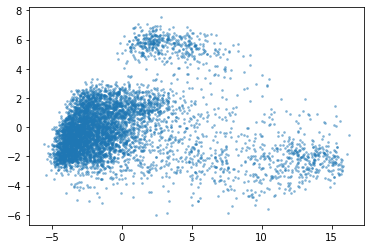

In [9]:
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'].iloc[:], df['pca-two'], s = 3, alpha= 0.4)
plt.show()

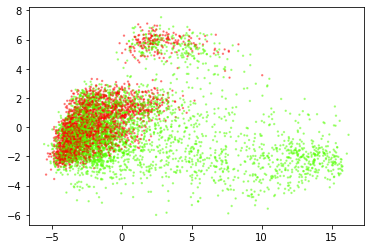

In [10]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 0
    else:
        return 1
df['color'] = df.Metadata_broad_sample.apply(is_dmso)
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'], df['pca-two'], c = df['color'], marker= 'o', s = 2, alpha= 0.4, cmap = 'prism')
plt.show()

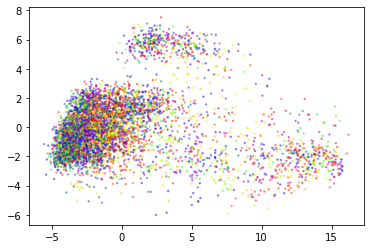

In [17]:
def wells(well):
    return ord(well[:1])*10 + int(well[1:])
df['color'] = df.Metadata_Well.apply(wells)
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'], df['pca-two'], c = df['color'], marker= 'o', s = 2, alpha= 0.4, cmap = 'prism')
plt.show()

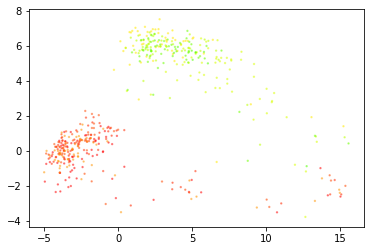

In [60]:
def plate_map(plate):
    return int(plate[5:]) % 150
df['color'] = df.Metadata_Plate.apply(plate_map)
plt.style.use({'figure.facecolor':'white'})
s = 2000
f = 2500
plt.scatter(df['pca-one'].iloc[s:f], df['pca-two'].iloc[s:f], c = df['color'].iloc[s:f], marker= 'o', s = 2, alpha= 0.4, cmap = 'prism')
plt.show()

In [48]:
sub_plates = df.Metadata_Plate.iloc[s:f].unique()

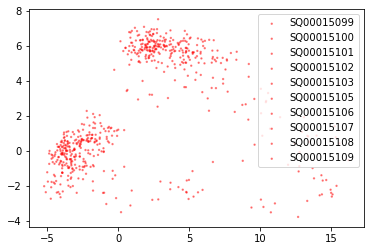

In [62]:
# check these subplates
for plate in sub_plates:
    sub = df.query("Metadata_Plate == @plate")
    c = [plate_map(plate)] * len(sub)
    plt.scatter(sub['pca-one'], sub['pca-two'], c =  c, marker= 'o', s = 2, alpha= 0.4, cmap = 'prism', label = plate)

plt.legend()
plt.show()

In [57]:
plt.style.use({'figure.facecolor':'white'})
plt.scatter(sub_df['pca-one'], sub_df['pca-two'], c = sub_df['color'], cmap= 'prism')
plt.show()

NameError: name 'sub_df' is not defined

In [31]:
df_part = df[df['Metadata_moa'].isin(df.Metadata_moa.value_counts()[:10].keys())].reset_index(drop=True)

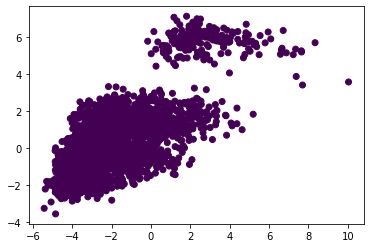

KeyboardInterrupt: 

In [33]:
plt.style.use({'figure.facecolor':'white'})
samples = df_part.Metadata_broad_sample.unique()
colors = range(len(samples))
n = 0
for sample in samples:
    sub = df_part.query("Metadata_broad_sample == @sample")
    c = [colors[n]] * len(sub)
    plt.scatter(sub['pca-one'], sub['pca-two'], c= c, label= sample)
    n += 1
    plt.show()

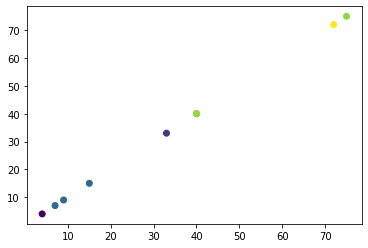

In [25]:
plt.style.use({'figure.facecolor':'white'})
samples = df.Metadata_Plate.unique()
colors = range(len(samples))
n = 0
for sample in samples:
    sub = df.query("Metadata_broad_sample == @sample")
    c = [colors[n]] * len(sub)
    plt.scatter(sub['pca-one'], sub['pca-two'], c= c, label= sample)
    n += 1

plt.show()

In [13]:
df.Metadata_moa.value_counts()[:4].keys()

Index(['unknown', 'phosphodiesterase inhibitor',
       'adrenergic receptor antagonist', 'histamine receptor antagonist'],
      dtype='object')

In [23]:
len(df.Metadata_broad_sample.unique())

912

In [ ]:
print(df.Metadata_moa.value_counts()[1:5].keys())

In [ ]:
# PCA plot
subs = df[df['Metadata_moa'].isin(df.Metadata_moa.value_counts()[1:5].keys())].reset_index(drop=True)

In [42]:
map(int, ['string_list'])

In [46]:
import hashlib
s = 'your strinsg'
int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 100

25

In [49]:
def hash(string):
    return int(hashlib.sha256(string.encode('utf-8')).hexdigest(), 16) % 100
df['color'] = df['Metadata_Plate'].apply(hash)